In [53]:
url = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'
from urllib.request import urlretrieve
urlretrieve(url, 'freemont.csv')

('freemont.csv', <http.client.HTTPMessage at 0x1936329a400>)

In [2]:
import pandas as pd
df = pd.read_csv('freemont.csv', index_col = 'Date', parse_dates = True)
df.columns = ['West' , 'East']
df['Total'] = df['West'] + df['East']
print(df.head())

                     West  East  Total
Date                                  
2012-10-03 00:00:00   4.0   9.0   13.0
2012-10-03 01:00:00   4.0   6.0   10.0
2012-10-03 02:00:00   1.0   1.0    2.0
2012-10-03 03:00:00   2.0   3.0    5.0
2012-10-03 04:00:00   6.0   1.0    7.0


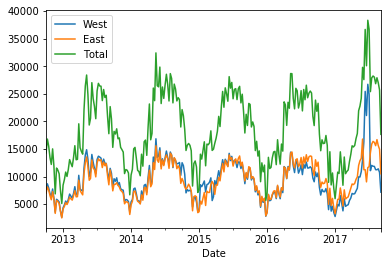

In [3]:
%matplotlib inline
df.resample('W').sum().plot()

(0, 1059460.05)

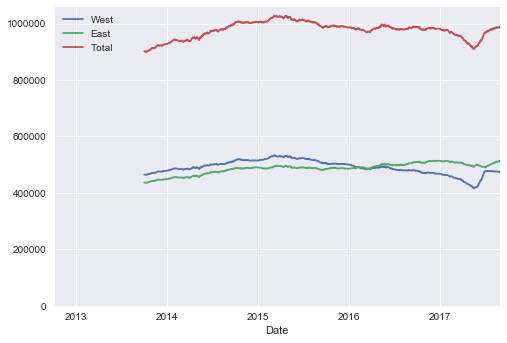

In [7]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
ax = df.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None)

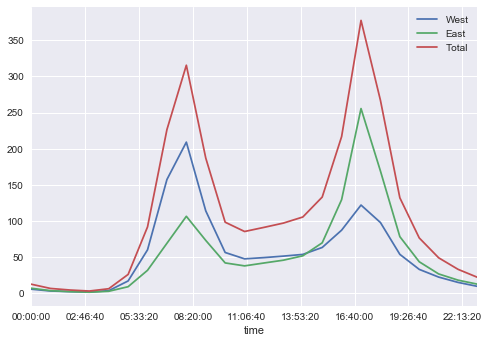

In [10]:
df.groupby(df.index.time).mean().plot()

In [12]:
pivoted = df.pivot_table('Total', index = df.index.time, columns=df.index.date)
pivoted.iloc[ :5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


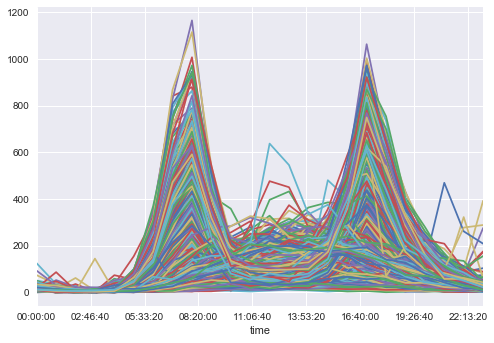

In [13]:
pivoted.plot(legend = False)